In [1]:
import os
import pickle

from functions import * # import util functions
from collections import Counter
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

In [2]:
# paths
cwd = os.getcwd()
image_folder = '/images'
images_path = cwd + image_folder

In [4]:
def get_eligible_node_IL(m,  path_list, indx_list):


        # for debug
        print('get_eligible_node_IL')

        # find all current nodes
        current_nodes = np.array(indx_list).reshape(-1)

        # find all nodes with 5 edges
        current_nodes_m = Counter(current_nodes)

        # find the set of nodes with less then m edges
        eligible_nodes_IL = [key for (key,value) in current_nodes_m.items() if value < m]
        

        # exeption to handle a case where all the nodes in indx_list have m edges
        # Should connect very quickly
         
        try:
                # draw new img1 from this set
                img =  np.random.choice(eligible_nodes_IL, 1, replace= False).item()

        except:                
                # so just allow a current nodes more edges 
                img =  np.random.choice(current_nodes, 1, replace= False).item()
                # this is also a nice way to get the network imploding back on it self.

        return(img)

In [5]:
def get_edge(path_list, indx_list, img1):

        # for debug
        print('get_edge')

        if len(indx_list) == 0:
            img2 = np.random.choice(path_list, 1, replace= False).item()

        else:  
            img2 = get_eligible_node_IL(m, path_list, indx_list)

        # Save the two paths
        edge = tuple([img1,img2])
    
    # CHECK: img should not be the same as img2 and the pair should not already have been compared
        while img1 == img2 or edge in indx_list or (edge[1], edge[0]) in indx_list:

            # while/if there is an issue, just draw a new random img2 from path list
            # this will always connect since img per dif (ex 1st round) is in the indx_list if we get here
            img2 = np.random.choice(path_list, 1, replace= False).item()

            # we make a new two_paths
            edge = tuple([img1,img2])

        #when happy, return the new pair:
        return(edge)

In [6]:

def make_indx_list(images_path, n_pairs, m, seed):

    # util functions:
    #indx_list = getIndexList(cwd)
    indx_list = [] # just for tests - no you end up pregenerateing it so there will not be a load ans save thing right?
    path_list = getImagesPath(images_path)

    # set seed
    np.random.seed(seed)

    # while we have not create the whole network
    while len(indx_list) < n_pairs: 
        clear_output()

        # if it is the first entry, draw a random entry
        if len(indx_list) == 0:
            img1 = np.random.choice(path_list, 1, replace= False).item()

        # if it is not the first entry, 
        else:
            # Find a eligible img from the indx list
            img1 = get_eligible_node_IL(m, path_list, indx_list)

        # draw and edge between img1 and another image (img2)
        edge = get_edge(path_list, indx_list, img1)

        # append the new edge to your indx_list
        indx_list.append(edge)

        
        print(f'{len(indx_list)}/{n_pairs}')


    return(indx_list)


In [7]:
def analyse_network(indx_list):


    G = nx.from_edgelist(indx_list)
    print(f'Number of edges: {len(G.edges)}') # same as len(indx_list)
    print(f'Number of nodes: {len(G.nodes)}') # same as len(indx_list)
    print(f'Connected network: {nx.is_connected(G)}')

    G_degrees = list(dict(G.degree).values())

    print(f'Mean degrees: {np.mean(G_degrees)}')
    print(f'Min degrees: {np.min(G_degrees)}')
    print(f'Max degrees: {np.max(G_degrees)}')

    plt.figure(figsize=[20,5])

    plt.subplot(1,3,1)
    plt.title('network random layout')
    nx.draw(G, pos=nx.random_layout(G), node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')

    plt.subplot(1,3,2)
    plt.title('network spring layout')
    nx.draw(G, pos=nx.spring_layout(G), node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')

    plt.subplot(1,3,3)
    plt.title('network degree distribution')
    plt.hist(G_degrees, density=True, bins= 50)
    sns.kdeplot(G_degrees)

    plt.show()

In [8]:
#seed
seed = np.random.seed(42)

# I set n_pairs to 27000 which is what is possible if you can annotate one pair every 10 seconds (you likely can't)
n_pairs = int((75*60*60)/10) # one pair, every ten seconds for 75 hours = 27000 pairs/edges.
#n_pairs = 14000 # for test run

# Approximnate mean number of edges between nodes/imgs. Trad-off between connectivity and number of nodes.
m = 5

# make the index list
indx_list = make_indx_list(images_path, n_pairs, m, seed)

# estimated time 15 min...


get_eligible_node_IL
get_edge
get_eligible_node_IL
14000/14000


Number of edges: 14000
Number of nodes: 2572
Connected network: True
Mean degrees: 10.88646967340591
Min degrees: 5
Max degrees: 34


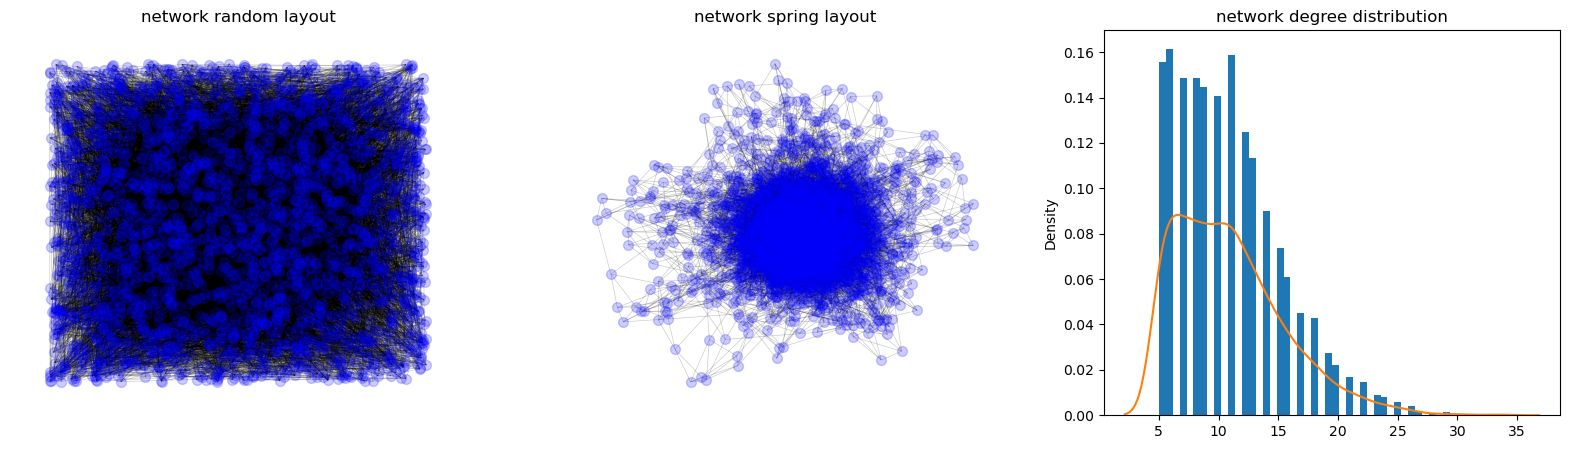

In [9]:
analyse_network(indx_list)

Number of edges: 25
Number of nodes: 12
Connected network: True
Mean degrees: 4.166666666666667
Min degrees: 1
Max degrees: 5


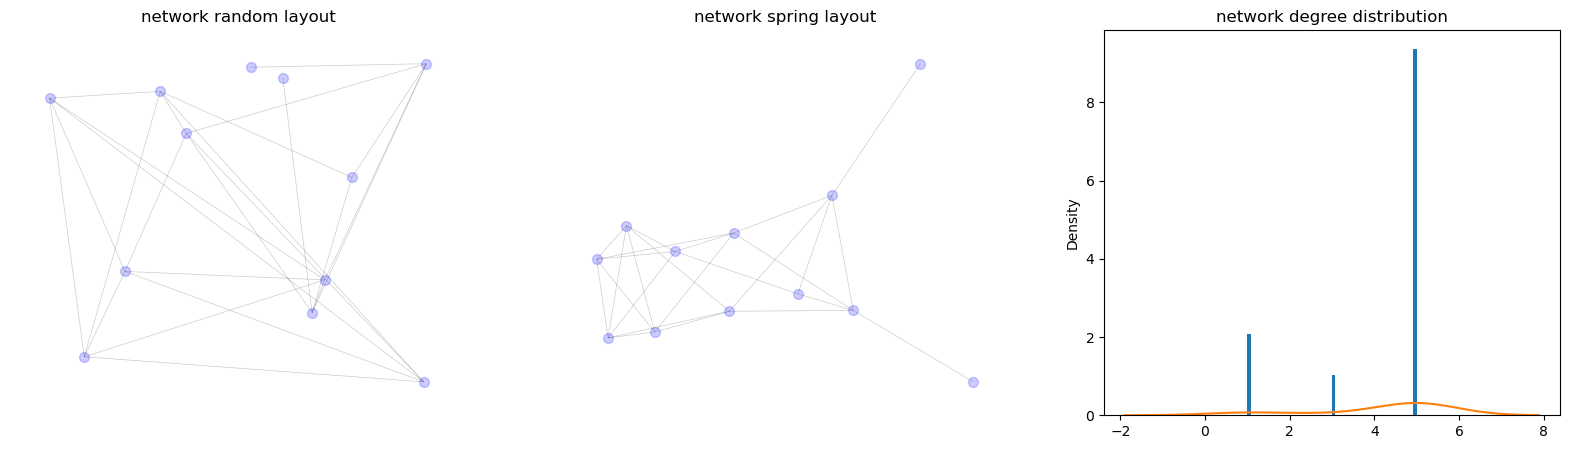

Number of edges: 100
Number of nodes: 47
Connected network: True
Mean degrees: 4.25531914893617
Min degrees: 1
Max degrees: 5


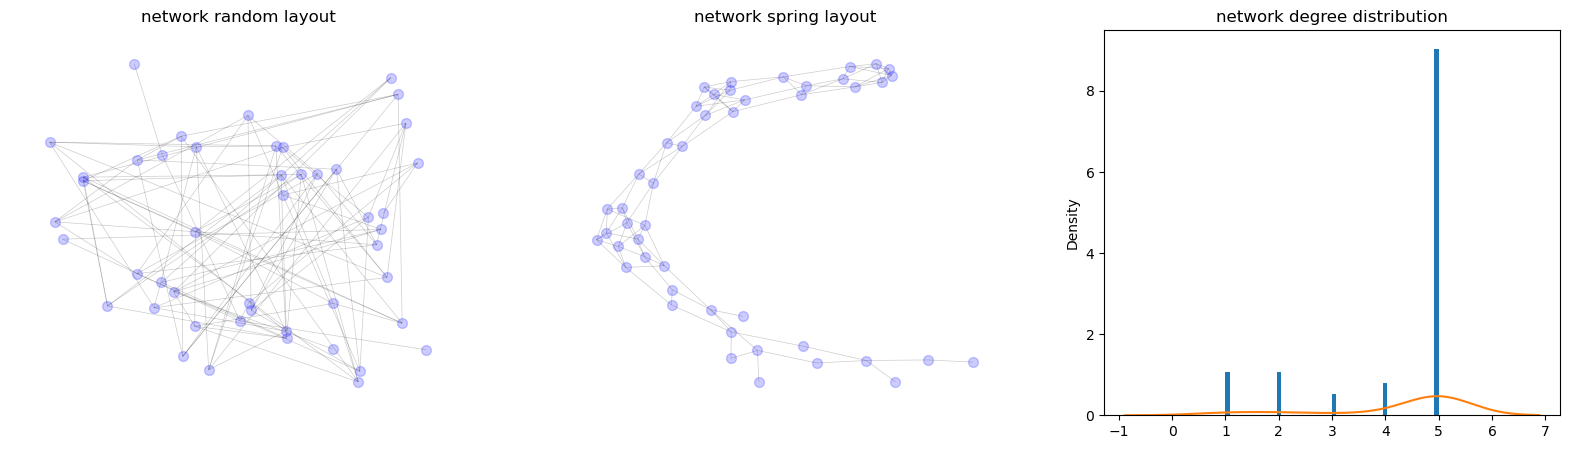

Number of edges: 250
Number of nodes: 102
Connected network: True
Mean degrees: 4.901960784313726
Min degrees: 1
Max degrees: 5


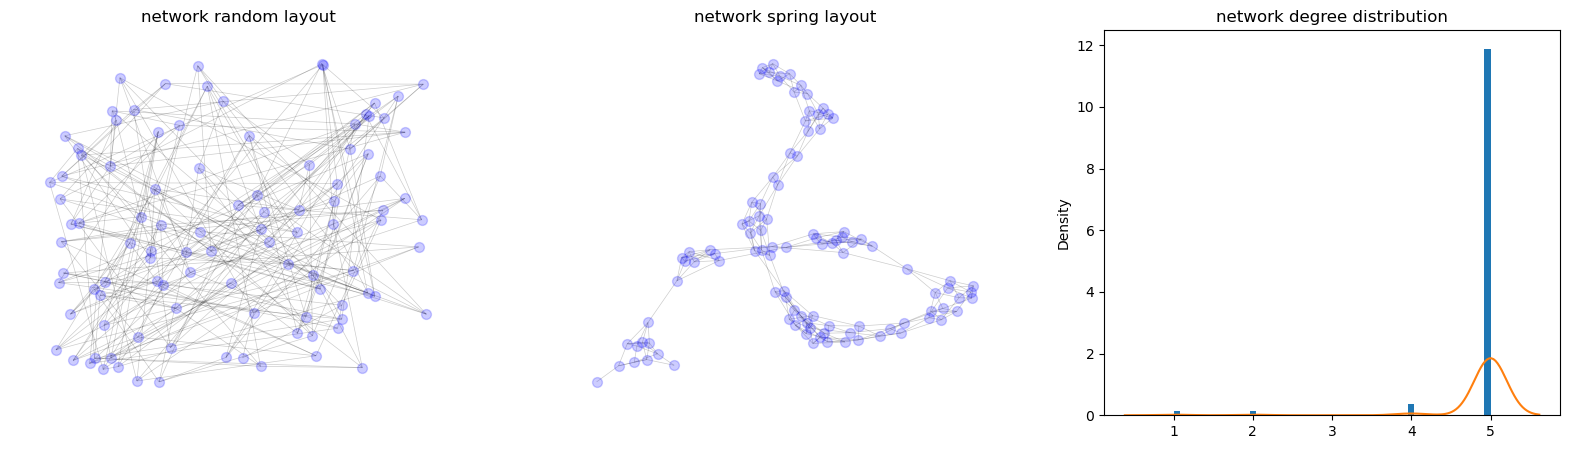

Number of edges: 1000
Number of nodes: 398
Connected network: True
Mean degrees: 5.025125628140704
Min degrees: 2
Max degrees: 6


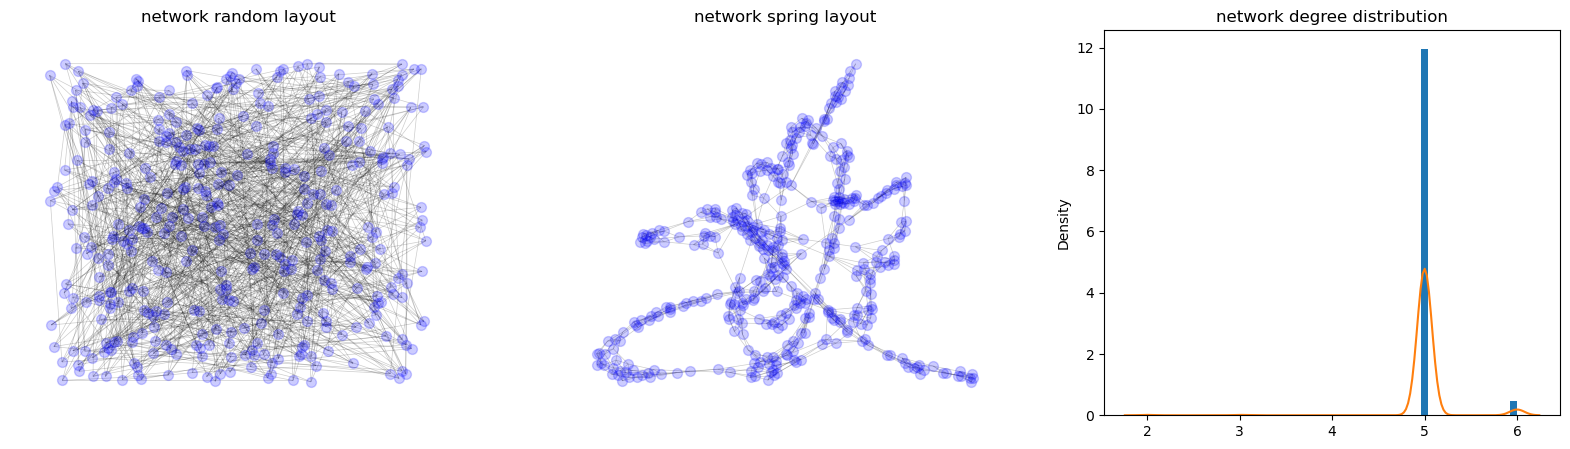

In [10]:
# test subsets (which is what will likely be annotated
analyse_network(indx_list[:25])
analyse_network(indx_list[:100])
analyse_network(indx_list[:250])
analyse_network(indx_list[:1000])

In [11]:
pickle.dump(indx_list, open( "pregenerated_indx_list.pkl", "wb" ))